### 机器学习:
    如果程序上 任务T能量度P 通过E 提升
    1. 监督学习
        告诉计算机如何做某件事情
        带有标签 预测分类( 指定做什么分类 ())
        特征变量(做模型的)  目标变量(预测 分类指标)
     
     X  y  特征值 目标值 -> 训练集  测试集 -> 数据模型拟合(训练模型)
    
    2. 无监督学习
        程序去自己学习

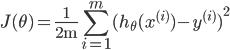

### 线性回归:
    代价函数 h(x) = theta1 + theta2x2 + ........
    求出theta (代价函数) 代价越小 拟合出来的方程离真实值越近
    有m条数据

代表我们要拟合出来的方程到真实值距离的平方, 平方有可能负数

In [4]:
import numpy as np

In [5]:
def computerCost(X, y, theta):
    m = len(y)
    J = 0
    J = (np.transpose(X*theta-y)) * (X * theta-y) / (2 * m) # 计算代价J
    return J

代价函数 对 tehtaj 求偏导 得到:
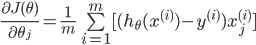

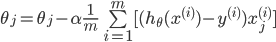

In [ ]:
梯度下降:
        

In [29]:
def ngradientDescent(X, y, theta, alpha, num_iters):
    m = len(y)
    n = len(theta)
    # 每次迭代计算的theta 矩阵
    temp = np.matrix(np.zeros((n, num_iters)))
    J_histiry = np.zeros((num_iters, 1)) # 记录每次迭代计算的价值
    for i in range(num_iters):
        h = np.dot(X, theta) # 计算内积
        temp[:, i] = theta - ((alpha/m) * (np.dot(np.transpose(X), h-y)))
        theta = temp[:, i]
        J_histiry[i] = computerCost(X, y, theta)
    return theta, J_histiry

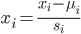

Ui -> 特征的均值
Si -> 最大值 - 最小值 (也可以是特征标准差)
归一化目的: 使数据缩放到一个范围

In [18]:
def featureNormaliza(X):
    x_norm = np.array(X)
    
    mu = np.zeros((1, X.shape[1]))
    sigma = np.zeros((1, X.shape[1]))
    
    mu = np.mean(x_norm, 0) # 均值 0 列 1 行
    sigma = np.std(x_norm, 0)
    for i in range(X.shape[1]):
        x_norm[:, i] = (x_norm[:, i] - mu[i]) / sigma[i] # 归一化
    
    return x_norm, mu, sigma

In [10]:
def loadTxt(fileName, split, dataType):
    ''' 加载txt文件 csv文件 '''
    return np.loadtxt(fileName, delimiter=split, dtype=dataType)

In [11]:
import matplotlib.pyplot as plt

In [13]:
def plot_x1_x2(x):
    plt.scatter(x[:, 0], x[:, 1])
    plt.show()

In [14]:
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

In [36]:
# 每次迭代代价的变化
def plotJ(J_history, num_iters):
    x = np.arange(1, num_iters+1)
    plt.plot(x, J_history)
    plt.xlabel('迭代次数')
    plt.ylabel('代价值')
    plt.show()

In [39]:
def LinearRegression(alpha=0.8, num_iters=400):
    data = loadTxt('./data.txt', ',', np.float64)  # 读取数据
    # x对应0到倒数第二列
    X = data[:, 0:-1] # 特征 训练数据
    y = data[:, -1] # 目标 原有值 定义  测试数据
    m = len(y)
    col = data.shape[1]
    
    X, mu, sigma = featureNormaliza(X) # 归一化
    plot_x1_x2(X)
    
    X = np.hstack((np.ones((m, 1)), X)) # 在x前面加一列
    theta = np.zeros((col, 1))
    y = y.reshape(-1, 1) # 向量转换成列
    print(theta.shape)
    print(y.shape)
    theta, J_history = ngradientDescent(X, y, theta, alpha, num_iters)
    print(J_history.shape, num_iters)
    plotJ(J_history, num_iters)
    return mu, sigma, theta

In [47]:
def perdict(mu, sigma, theta):
    result = 0
    predict = np.array([1650, 3])
    norm_predict = (predict-mu) / sigma
    final_predict = np.hstack((np.ones((1)), norm_predict))
    
    result = np.dot(final_predict, theta)
    return result

In [48]:
result = perdict(mu, sigma, theta)

In [49]:
result

matrix([[293081.4643349]])

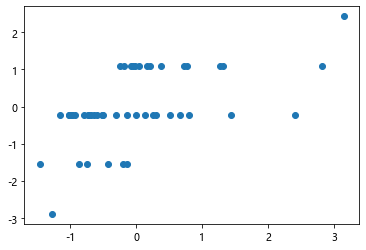

(3, 1)
(47, 1)
(400, 1) 400


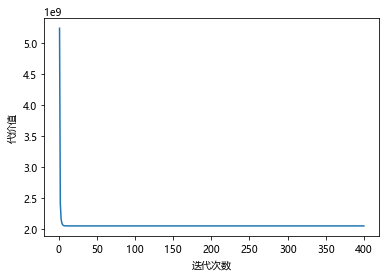

In [41]:
mu, sigma, theta = LinearRegression()